In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
data = pd.read_excel('bankruptcy-prevention.xlsx')
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [4]:
data.shape

(250, 7)

In [5]:
# Display basic info
print(data.head())


   industrial_risk   management_risk   financial_flexibility   credibility  \
0              0.5               1.0                     0.0           0.0   
1              0.0               1.0                     0.0           0.0   
2              1.0               0.0                     0.0           0.0   
3              0.5               0.0                     0.0           0.5   
4              1.0               1.0                     0.0           0.0   

    competitiveness   operating_risk       class  
0               0.0              0.5  bankruptcy  
1               0.0              1.0  bankruptcy  
2               0.0              1.0  bankruptcy  
3               0.0              1.0  bankruptcy  
4               0.0              1.0  bankruptcy  


In [6]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB
None


In [7]:

print(data.describe())

       industrial_risk   management_risk   financial_flexibility  \
count       250.000000        250.000000              250.000000   
mean          0.518000          0.614000                0.376000   
std           0.411526          0.410705                0.401583   
min           0.000000          0.000000                0.000000   
25%           0.000000          0.500000                0.000000   
50%           0.500000          0.500000                0.500000   
75%           1.000000          1.000000                0.500000   
max           1.000000          1.000000                1.000000   

        credibility   competitiveness   operating_risk  
count    250.000000        250.000000       250.000000  
mean       0.470000          0.476000         0.570000  
std        0.415682          0.440682         0.434575  
min        0.000000          0.000000         0.000000  
25%        0.000000          0.000000         0.000000  
50%        0.500000          0.500000        

In [8]:
# Check for missing values
print(data.isnull().sum())

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64


In [9]:
# Convert categorical target variable into numerical format
data[' class'] = data[' class'].map({'non-bankruptcy': 0, 'bankruptcy': 1})


In [10]:
print(data.columns)


Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')


In [11]:
data.head()


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1


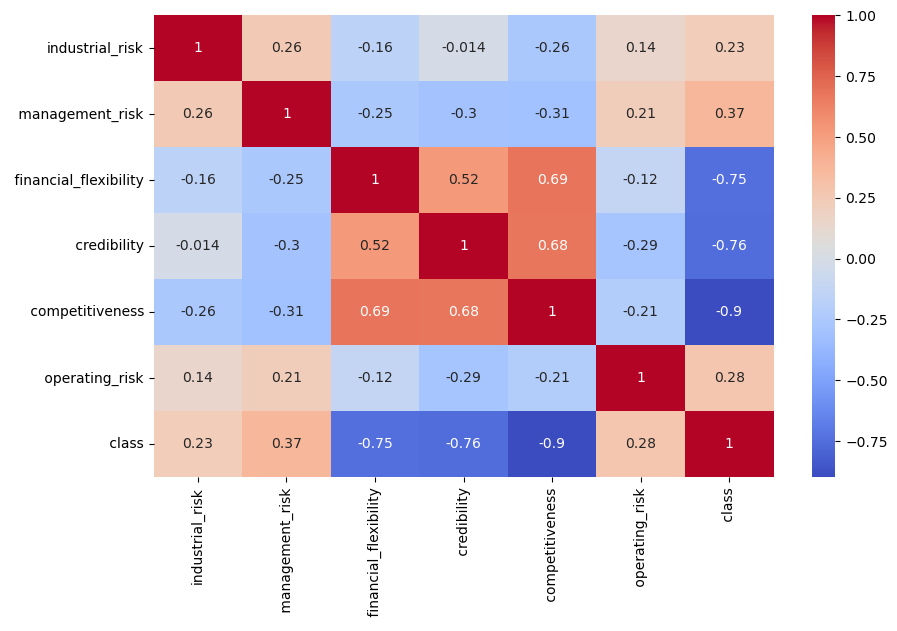

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


<Axes: >

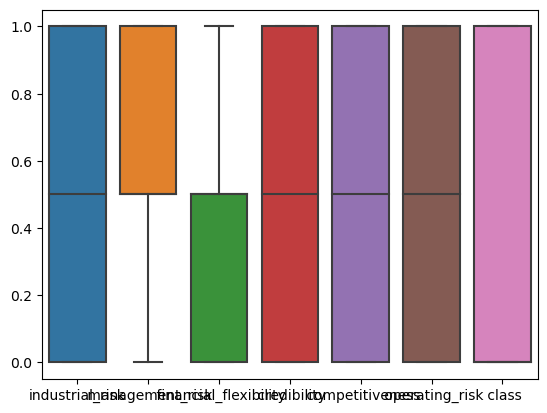

In [16]:
sns.boxplot(data=data)

# Data Visualization

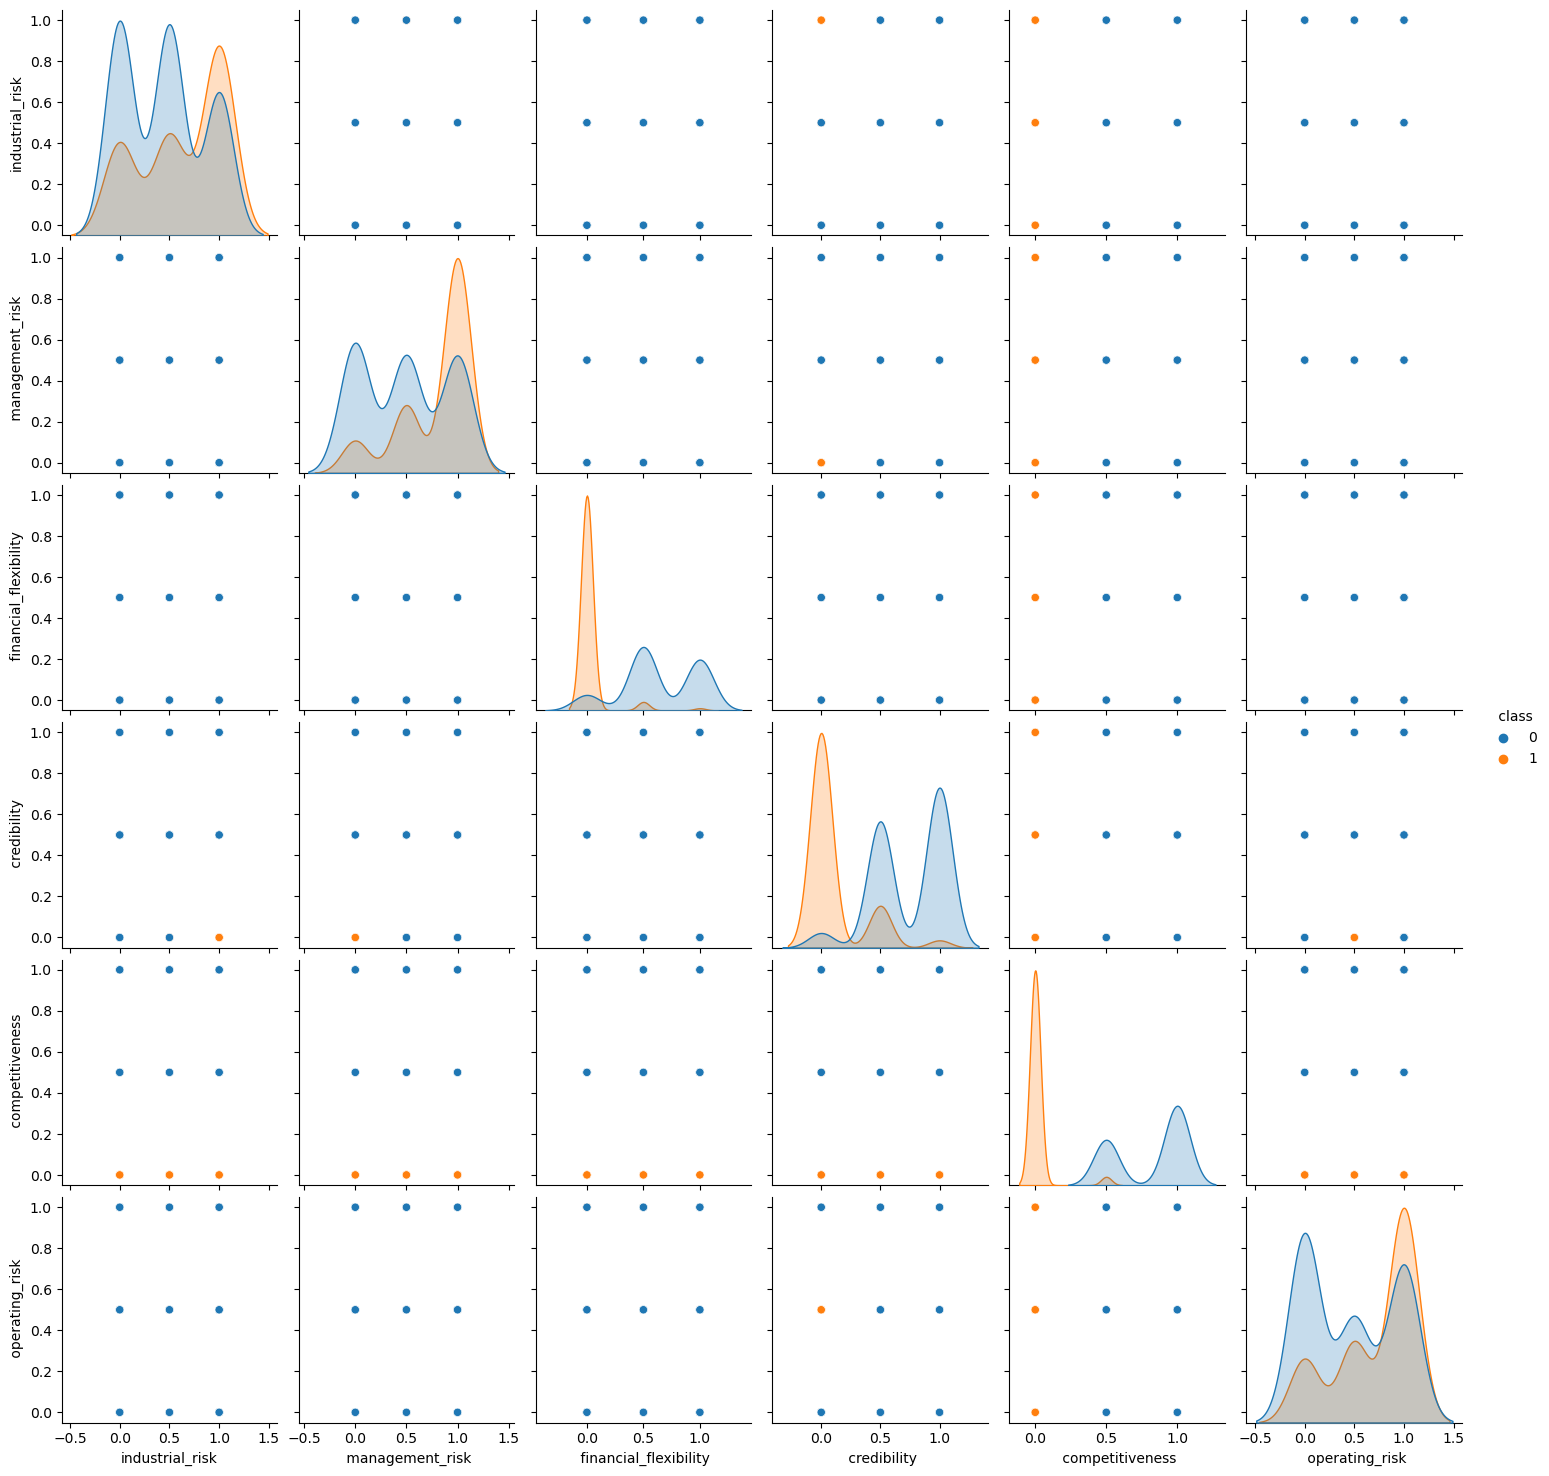

In [17]:
# Pairplot
sns.pairplot(data, hue=' class')
plt.show()


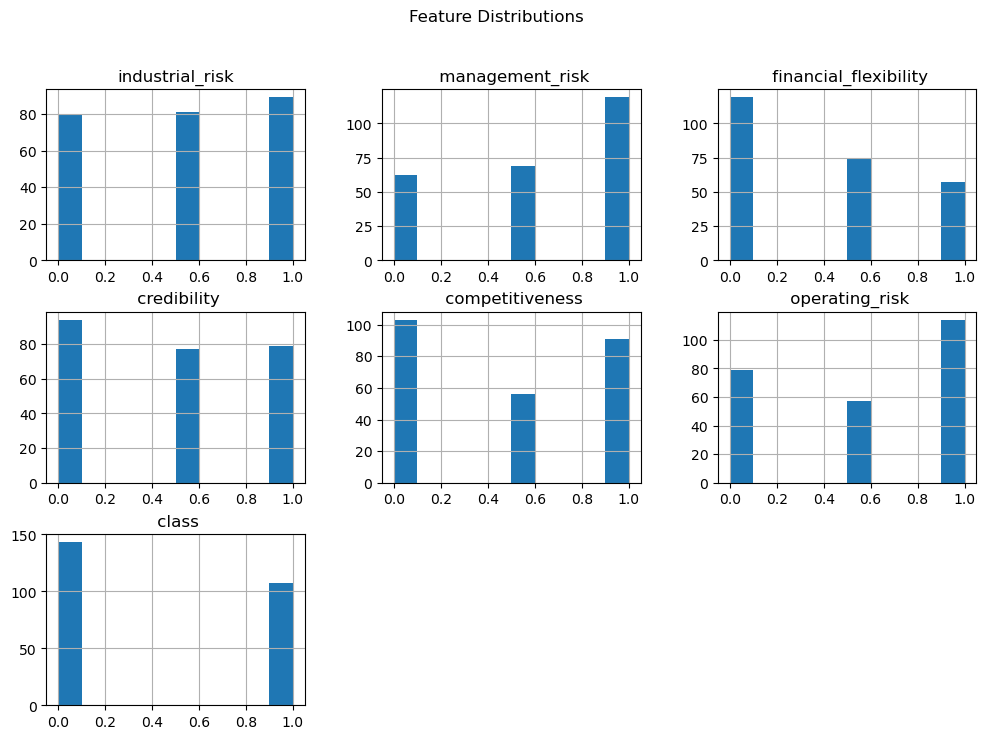

In [18]:
# Distribution of each feature
data.hist(figsize=(12, 8), bins=10)
plt.suptitle("Feature Distributions")
plt.show()

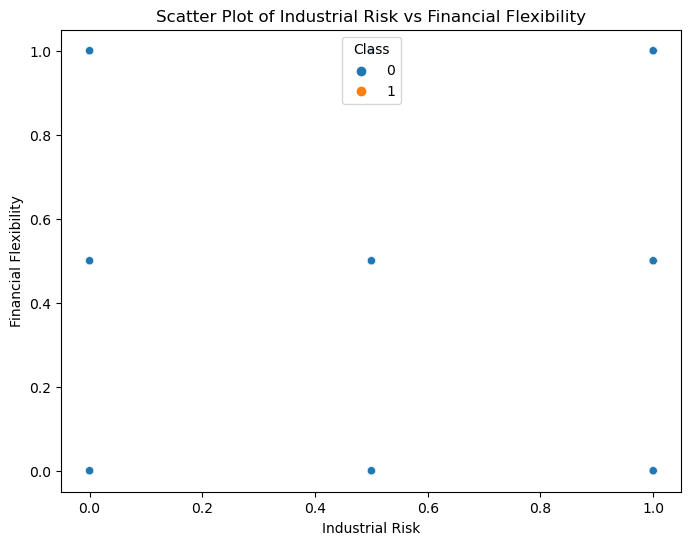

In [19]:
# Scatter plot for industrial risk vs financial flexibility
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['industrial_risk'], y=data[' financial_flexibility'], hue=data[' class'])
plt.xlabel("Industrial Risk")
plt.ylabel("Financial Flexibility")
plt.title("Scatter Plot of Industrial Risk vs Financial Flexibility")
plt.legend(title="Class")
plt.show()


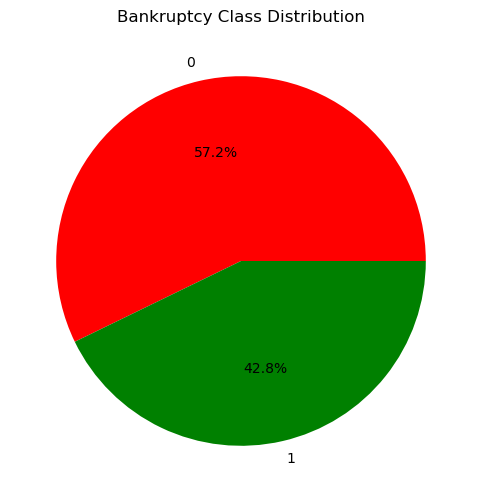

In [22]:
# Pie chart for class distribution
plt.figure(figsize=(6,6))
data[" class"].value_counts().plot.pie(autopct="%1.1f%%", colors=["red", "green"]) # Changed "class" to " class"
plt.title("Bankruptcy Class Distribution")
plt.ylabel("")
plt.show()

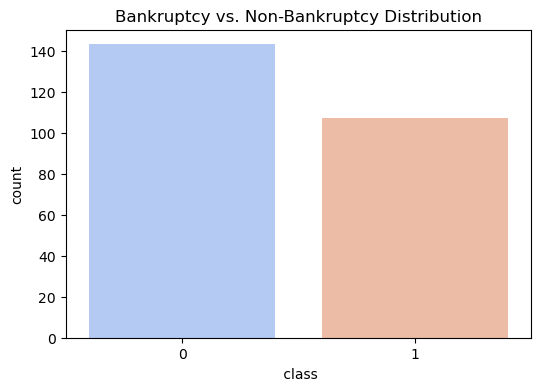

In [23]:
# Visualizing class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=" class", data=data, palette="coolwarm")
plt.title("Bankruptcy vs. Non-Bankruptcy Distribution")
plt.show()

In [15]:
# Split data into features and target variable
X = data.drop(columns=[' class'])
y = data[' class']

In [16]:
#split data into train and test

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Engineering

In [17]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model building

# Logistic Regression

In [27]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [28]:
# Predictions
y_pred_log = log_reg.predict(X_test)



In [29]:
y_pred_log_2=log_reg.predict(X_train)

In [32]:
# Evaluate Logistic Regression
print("Logistic Regression Accuracy_test:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("Logistic Regression Accuracy_train_:", accuracy_score(y_train, y_pred_log_2))
print(classification_report(y_train, y_pred_log_2))


Logistic Regression Accuracy_test: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Logistic Regression Accuracy_train_: 0.995
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       114
           1       1.00      0.99      0.99        86

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



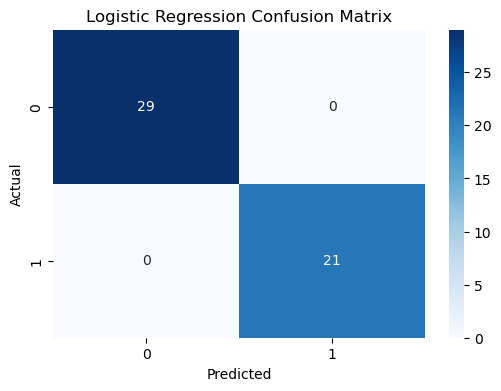

In [66]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# Random Forest Classifier

In [33]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:
# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_rf_2=rf.predict(X_train)

In [35]:
# Evaluate Random Forest
print("Random Forest Accuracy_test:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("Random Forest Accuracy_train:", accuracy_score(y_train, y_pred_rf_2))
print(classification_report(y_train, y_pred_rf_2))

Random Forest Accuracy_test: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Random Forest Accuracy_train: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



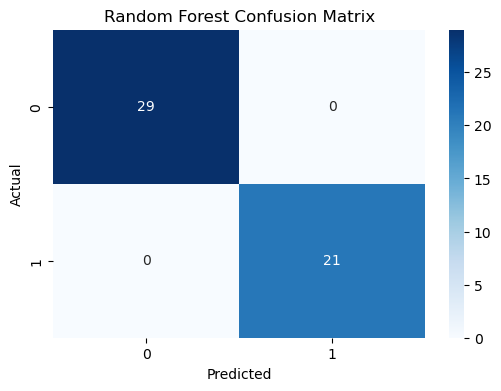

In [60]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


# decison tree classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [40]:
# Predictions
y_pred_dt = dt.predict(X_test)
y_pred_dt_2=dt.predict(X_train)

In [41]:
# Evaluate Decision Tree Classifier
print("Decision Tree Accuracy_test:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("Decision Tree Accuracy_train:", accuracy_score(y_train, y_pred_dt_2))
print(classification_report(y_train, y_pred_dt_2))


Decision Tree Accuracy_test: 0.98
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Decision Tree Accuracy_train: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



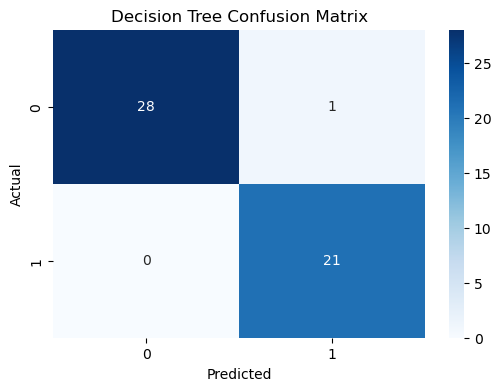

In [65]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# SVM

In [18]:
# Train Support Vector Classifier
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [19]:
# Predictions
y_pred_svc = svc.predict(X_test)
y_pred_svc_2 =svc.predict(X_train)

In [20]:
# Evaluate Support Vector Classifier
print("Support Vector Classifier Accuracy_test:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))


# Evaluate Support Vector Classifier
print("Support Vector Classifier Accuracy_train:", accuracy_score(y_train, y_pred_svc_2))
print(classification_report(y_train, y_pred_svc_2))


Support Vector Classifier Accuracy_test: 0.98
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Support Vector Classifier Accuracy_train: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



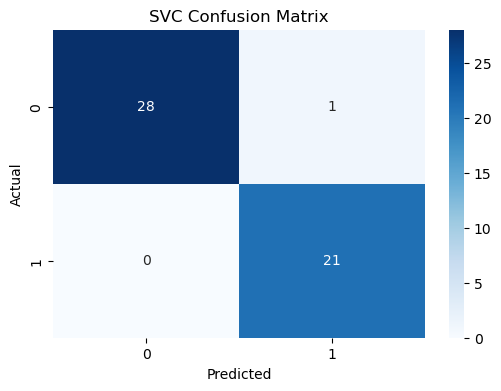

In [78]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVC Confusion Matrix")
plt.show()

# Gradient Boosting

In [45]:
# Train Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [46]:
# Predictions
y_pred_gb = gb.predict(X_test)
y_pred_gb_2 =gb.predict(X_train)

In [48]:
# Evaluate Gradient Boosting Classifier
print("Gradient Boosting Classifier Accuracy_test:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

# Evaluate Gradient Boosting Classifier
print("Gradient Boosting Classifier Accuracy_train:", accuracy_score(y_train, y_pred_gb_2))
print(classification_report(y_train, y_pred_gb_2))

Gradient Boosting Classifier Accuracy_test: 0.98
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Gradient Boosting Classifier Accuracy_train: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



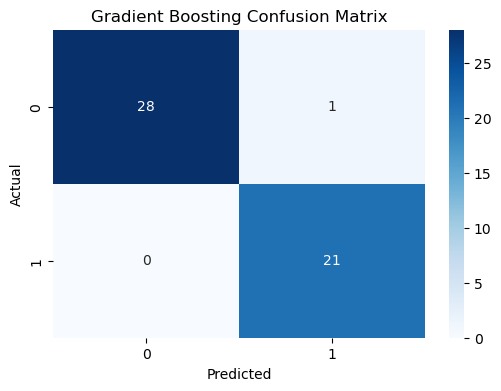

In [82]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


# save the model

In [21]:
import pickle
# Save the model to a file
with open("svc.pkl", "wb") as f:
    pickle.dump(svc, f)